# **Abstract:**

This dataset provides a comprehensive view of Airbnb listing activity and metrics in New York City for the year 2019. Since Airbnb's inception in 2008, it has revolutionized travel by offering unique and personalized accommodations. The dataset encompasses essential information about hosts, geographical availability, and various metrics crucial for predicting and drawing conclusions about pricing trends. With the potential to unlock insights into the factors influencing Airbnb prices in New York City, this dataset serves as a valuable resource for predictive modeling and analysis within the dynamic landscape of short-term property rentals.

The following questions are addressed in the analysis include

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

# **Dataset**

**The dataset comprises 48,895 entries with a RangeIndex ranging from 0 to 48,894. It encompasses 16 columns providing diverse information. Key columns include 'id' and 'host_id' as integer types, 'name' and 'host_name' as objects, representing identification and name details. 'neighbourhood_group', 'neighbourhood', and 'room_type' are categorical variables characterizing the property's location and type. Geospatial features, 'latitude' and 'longitude', are presented as float64. 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', and 'availability_365' provide numerical insights into pricing, accommodation specifics, and host activity. The 'last_review' column offers temporal information but exhibits non-null entries for 38,843 records. The dataset showcases a mix of data types, including integer, float, and object, reflecting the diverse nature of information available.**

# **Data Processing**

**Importing different libraries below so that I can perform cleaning and feature selection.**

In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [224]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Saisuraj999/SaiSuraj_DSMT_002241214/main/AB_NYC_2019.csv"
)

Displaying the first 5 rows of a DataFrame

In [225]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Displaying the last 5 rows of a DataFrame

In [226]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Dataset Describe

In [227]:

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Checking Unique Values for each variable.

In [228]:

df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

The below summary includes details about the index, column names, count of non-null values, data types, and memory usage. This information is useful for understanding the structure and completeness of the dataset, assisting in data exploration and preliminary analysis.

# **Q1 What are the data types? (Only numeric and categorical)**

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From above info we get to know that out of 10 variables in dataset 7 are int type and 3 are float type

id, host_id, price, minimum_nights, number_of_reviews, calculates_host_listings_count, availability_365 are integer variable
but latitude, longitude, reviews_per_month are float type.

also there are 6 object datatype variables

# **Data Visualization**

In [230]:
import seaborn as sns

In [231]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

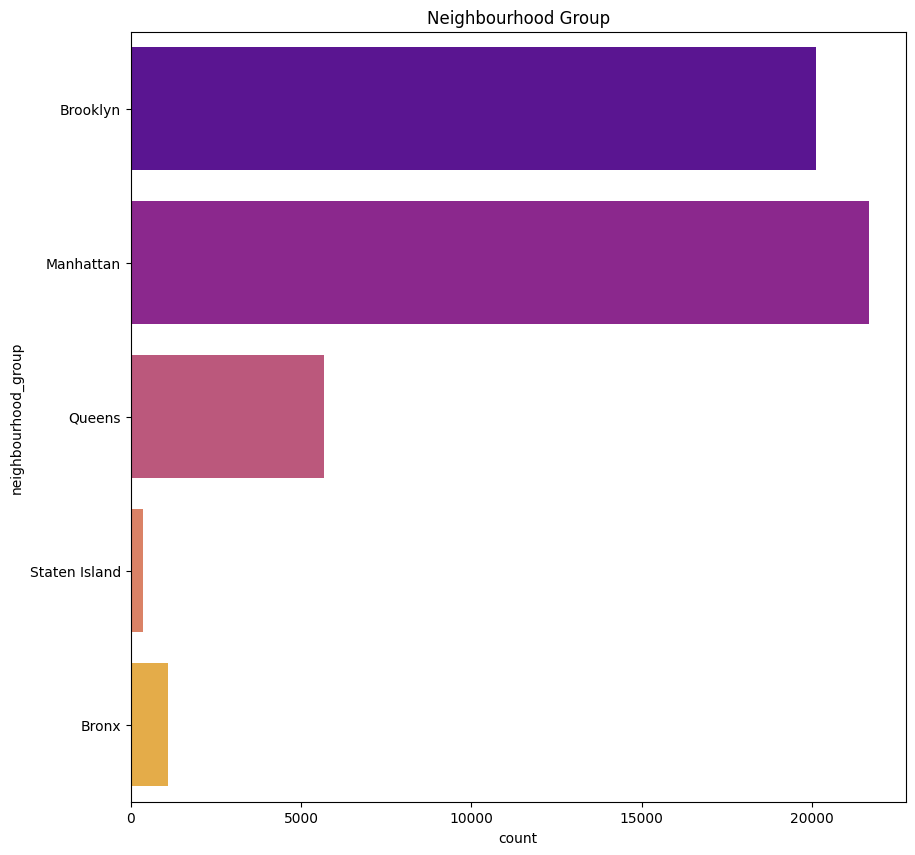

In [232]:
sns.countplot(df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

counting the number of missing values (NaN or null values) in each column of a DataFrame.

In [233]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **Q05 Which independent variables have missing data? How much? **

**Name has 16 missing data, Host name has 21 missing data, last review has 10052 missing data, reviews per month has has 10052 missing data and the missing values are imputed below**

Dataset Columns

In [234]:

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

*   The dataset comprises 48,895 entries with 16 columns, including 'id', 'name', 'host_id', and geographical data like 'latitude' and 'longitude'.
*   Data types of the dataset includes integers, floats, and objects, with columns like 'host_name', 'last_review' in object format.
*   Notable columns with null values are 'name', 'host_name', 'last_review', and 'reviews_per_month', with the latter two having a substantial number of null entries (10,052).
*   No duplicate entries are present in the dataset.
*   Data cleaning considerations will involve handling null values, dropping unnecessary columns, and addressing potential outliers in numeric columns.




# **Q2 Are there missing values?**

Data Wrangling process

In [235]:
# Data Wrangling

# Dropping id, host_id, host_name, last_review as they are unnecessary and will not impact our analysis and dataset
df.drop(['id', 'name','host_id','host_name', 'last_review'], axis=1, inplace=True)


# Filling null entries in name column with 'Unknown'
# df['name'].fillna('Unknown', inplace=True)


# Filling null entries of reviews_per_month column with mean of all the other values of that column
mean_reviews_per_month = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)


# Checking null entries after filling Null values
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

From above we come to know there is no null values in the above dataset.

# **Q3 What are the likely distributions of the numeric variables?**

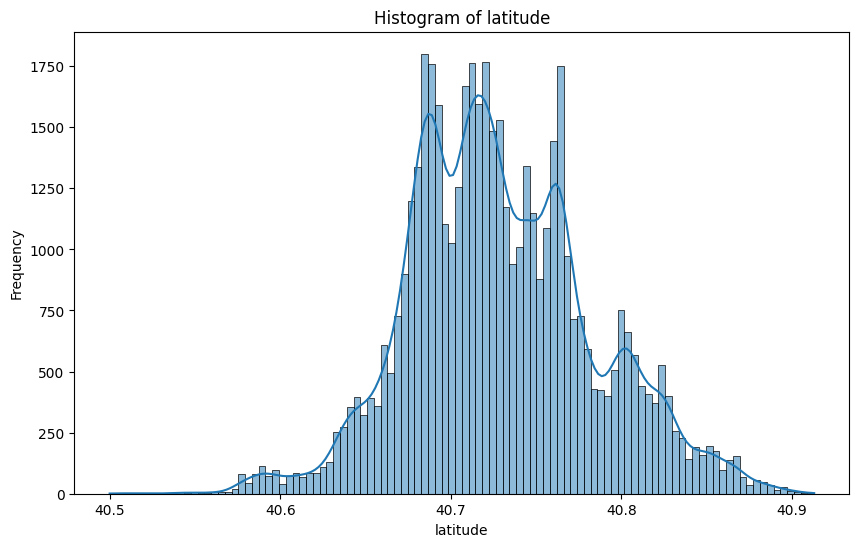

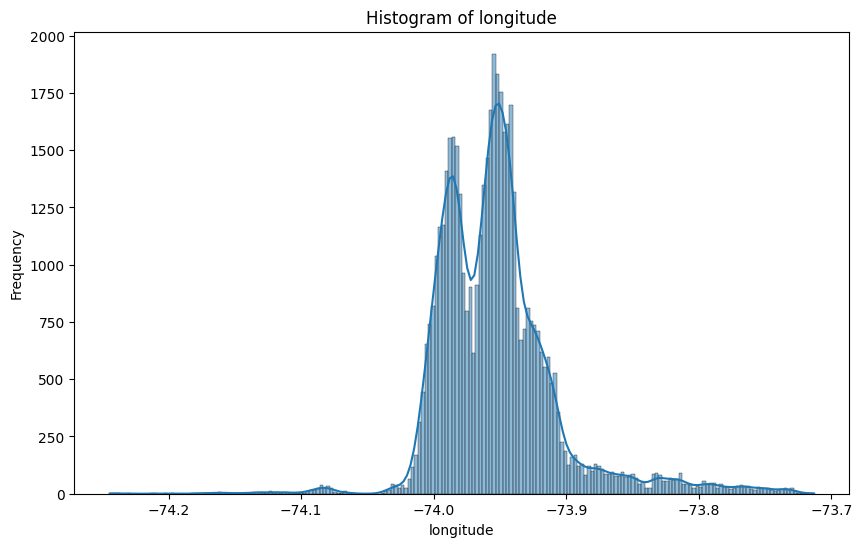

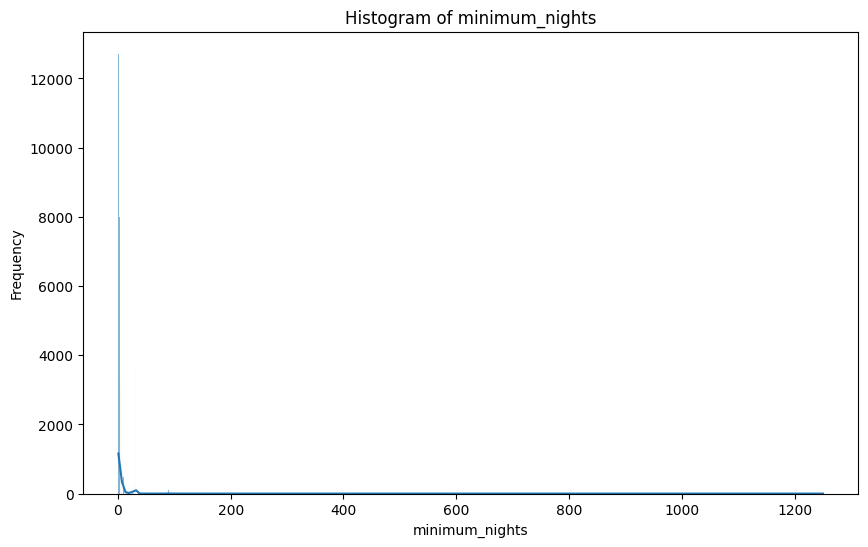

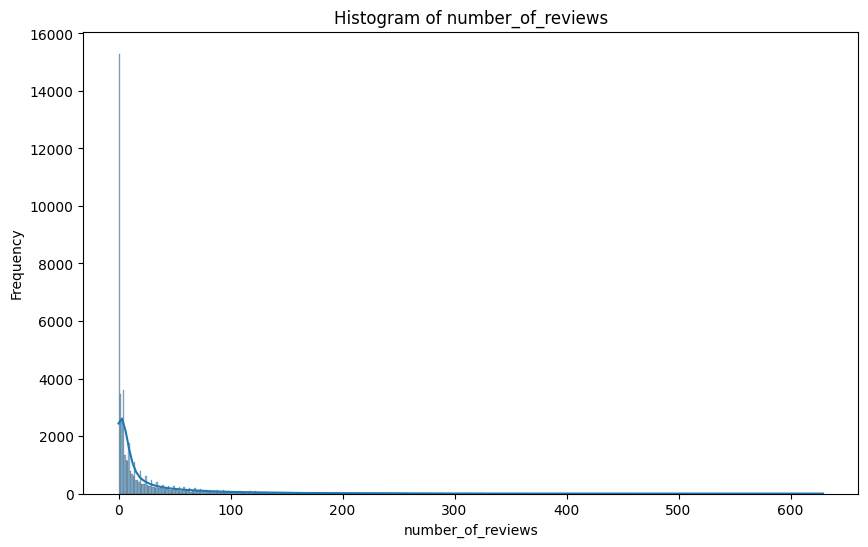

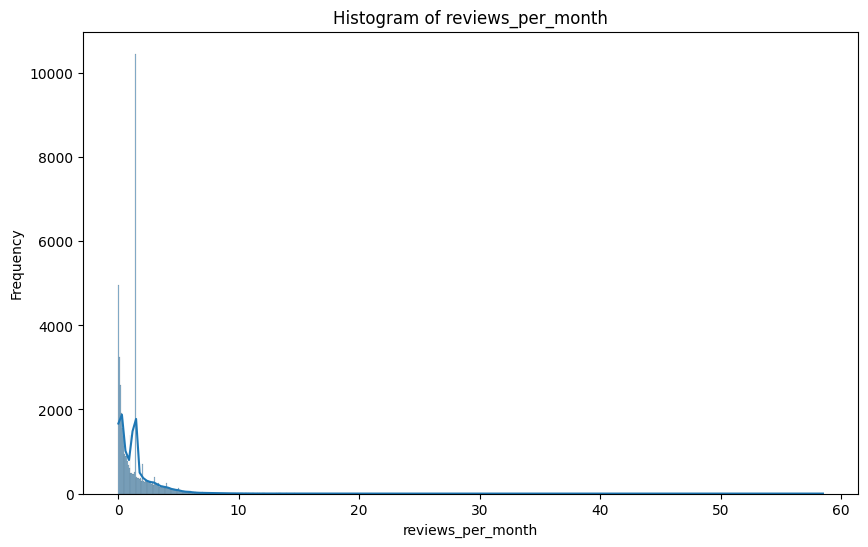

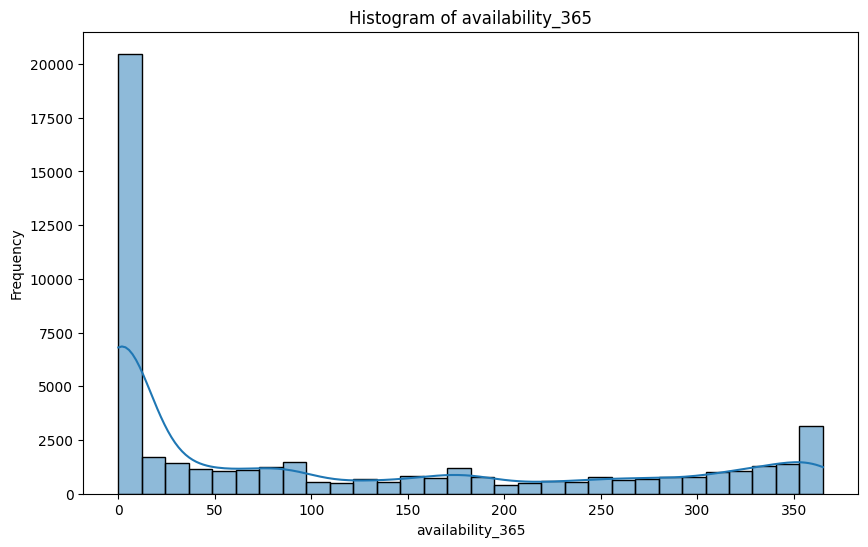

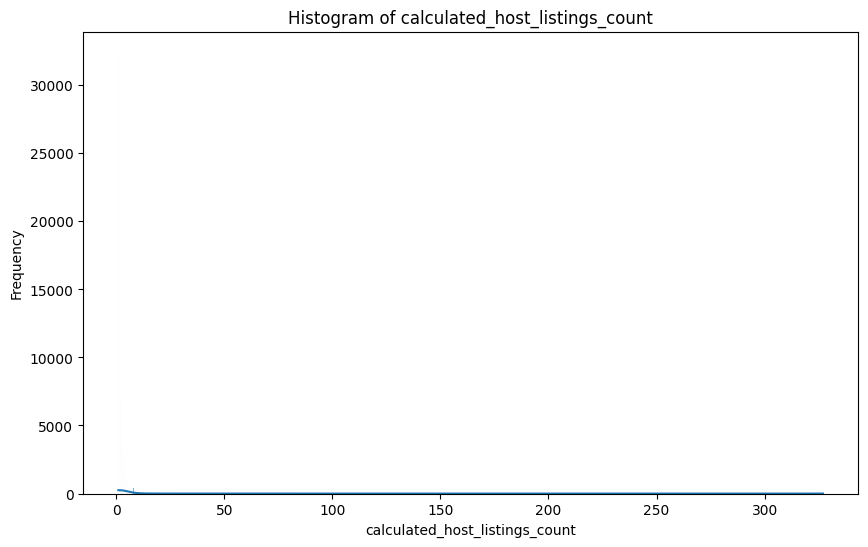

In [236]:
# Extracting numerical columns from dataset
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


here we are going to visualize the outliers first and then work on handling/removing outliers

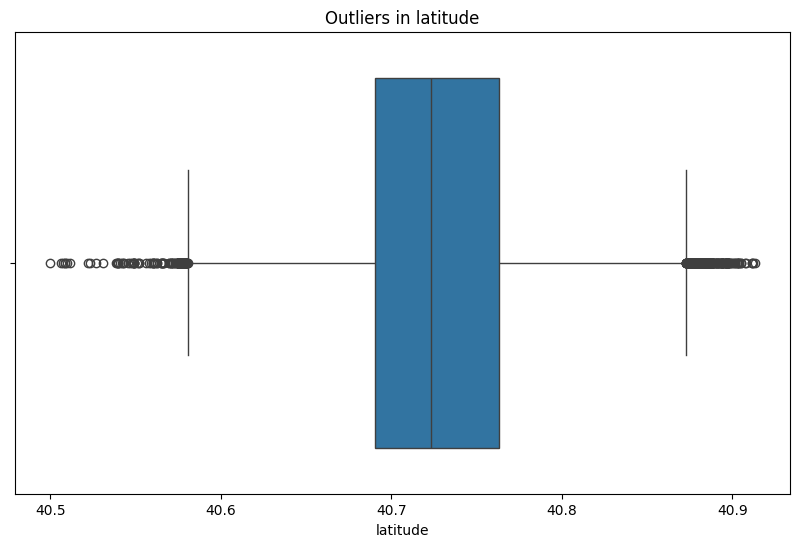

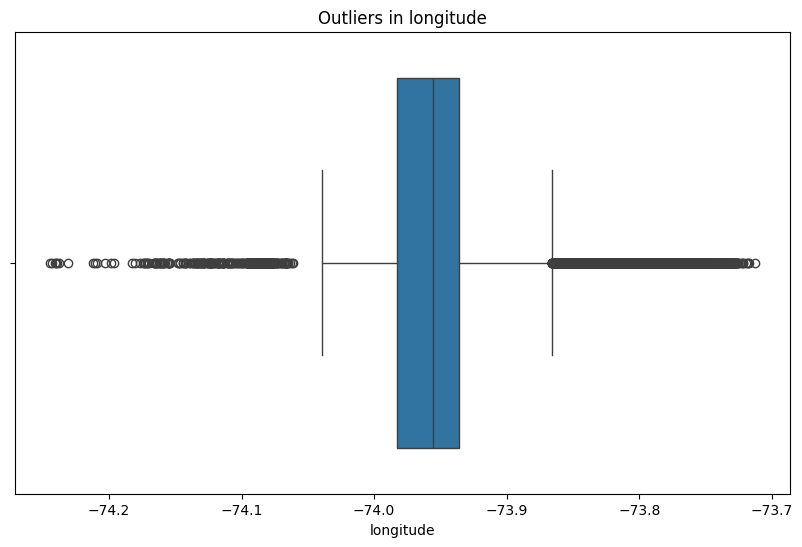

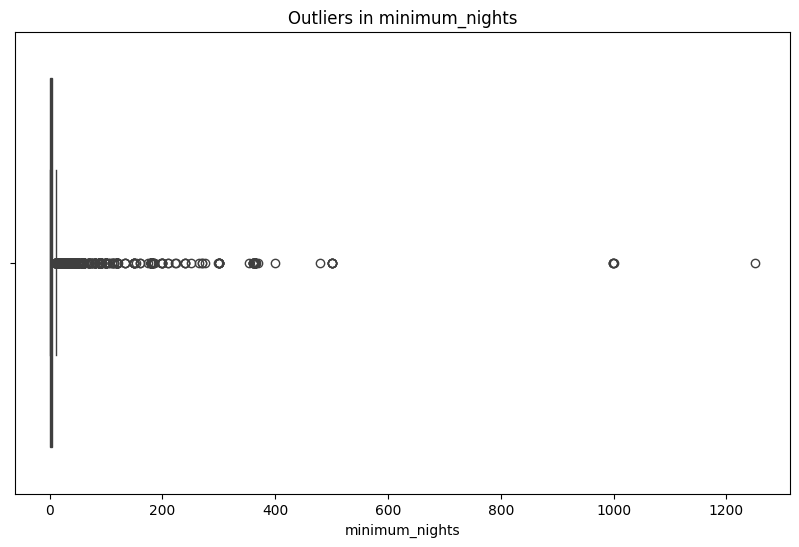

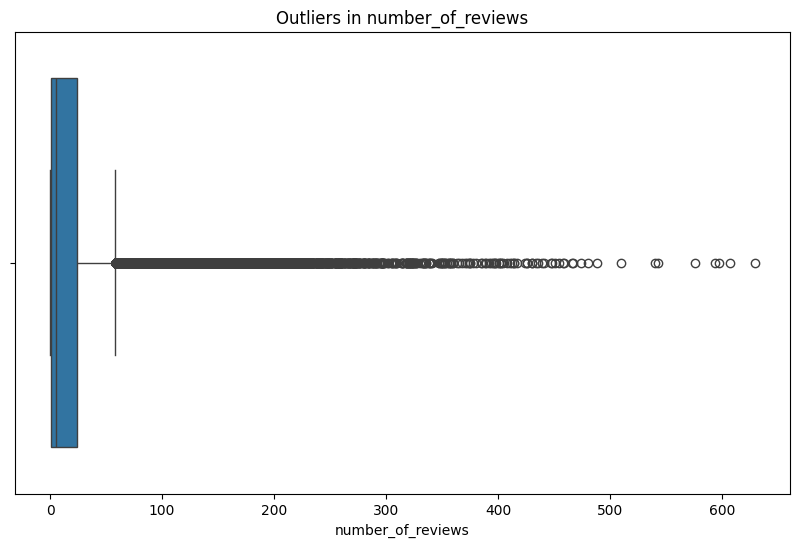

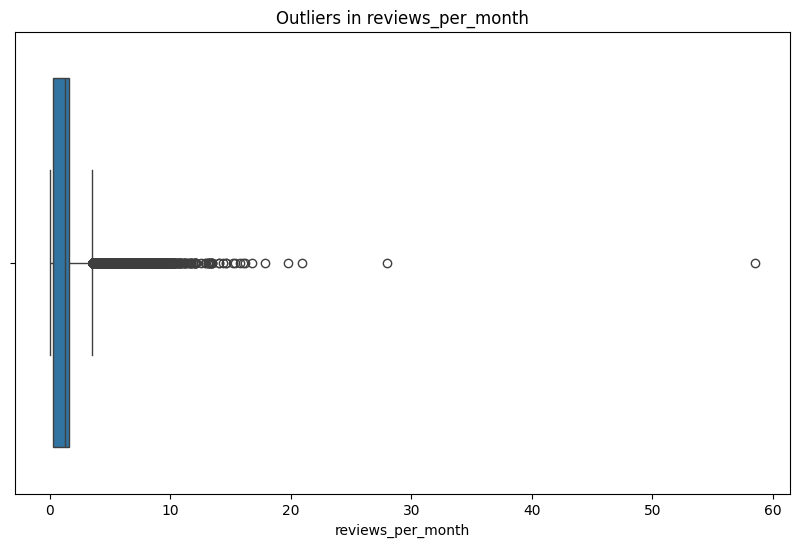

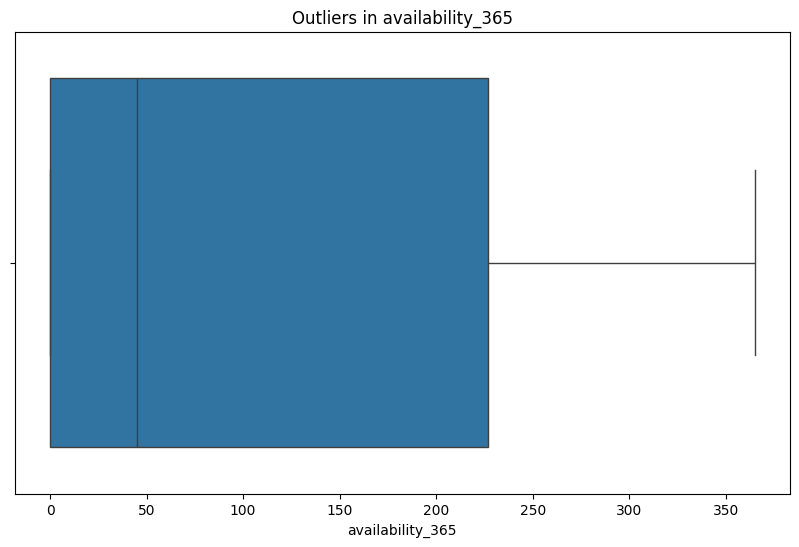

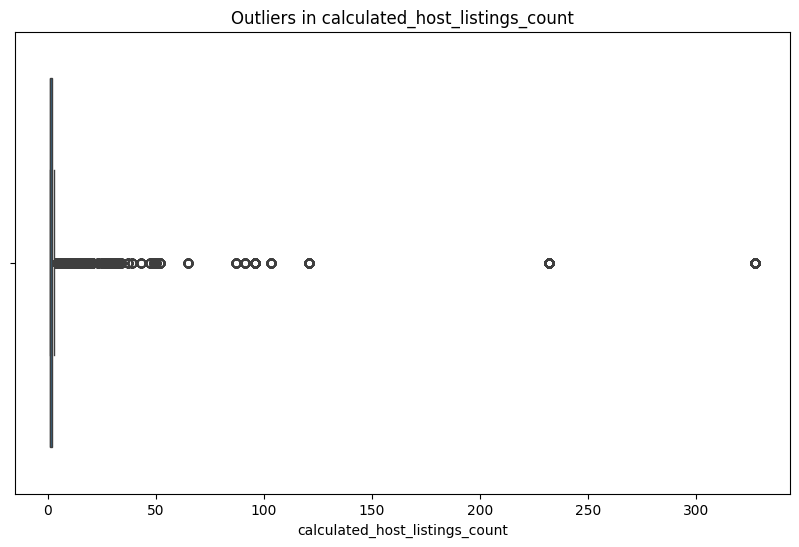

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize outliers for each numerical column
def plot_outliers_for_all_numerical_columns(df):
    # Identifying numerical columns
    # numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Plotting boxplots for each numerical column
    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Outliers in {column}')
        plt.show()

# Visualizing outliers for all numerical columns
plot_outliers_for_all_numerical_columns(df)

# **Q09 Do the ranges of the predictor variables make sense?**

**based on the boxplot, we got to know that we have outliers for the numerical variables and these need to be handled inorder to perform the price prediction**

# **Q10 What are the distributions of the predictor variables?**

**Histogram and box plot shows the distribution of predictor variables**

Taking the copy of data frame before handling outliers

In [203]:
data_with_outliers = df.copy()
data_with_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


# **Q11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

Handling outliers

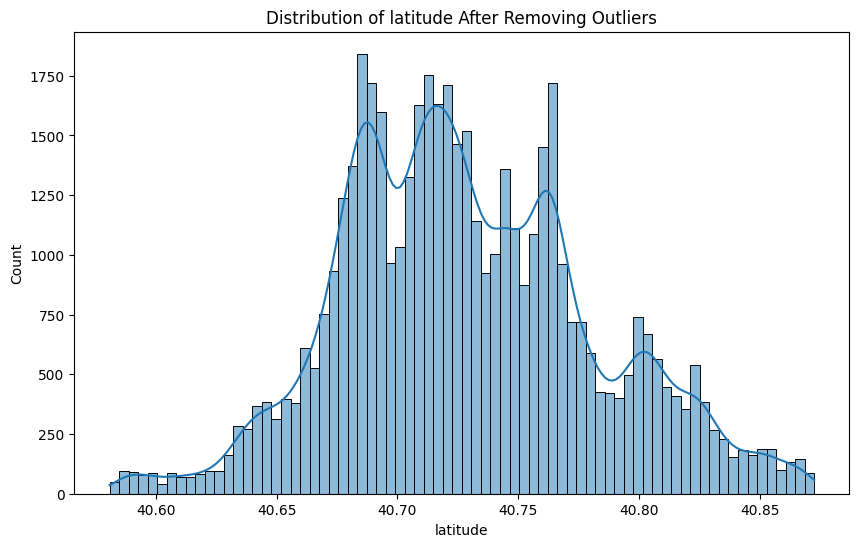

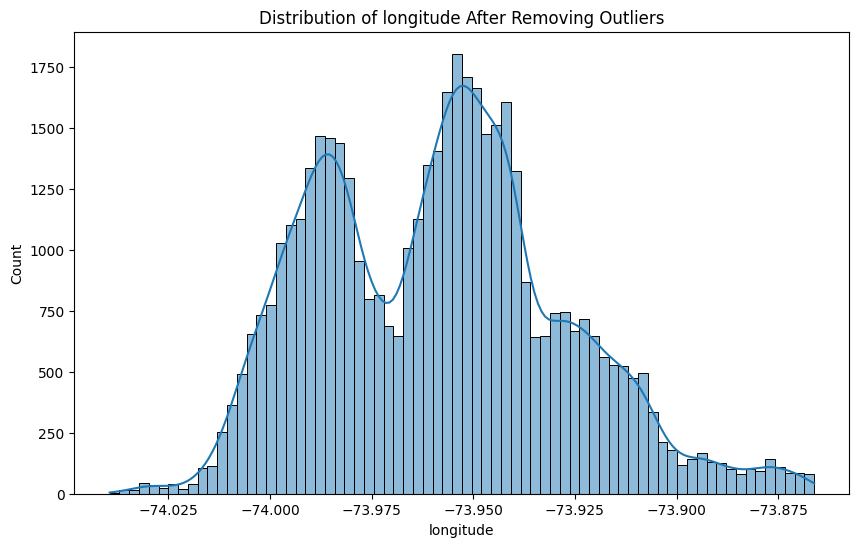

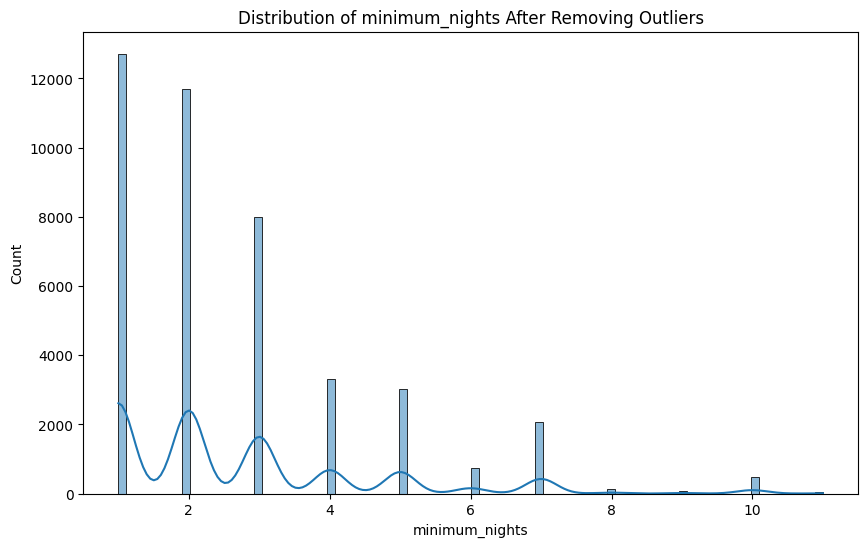

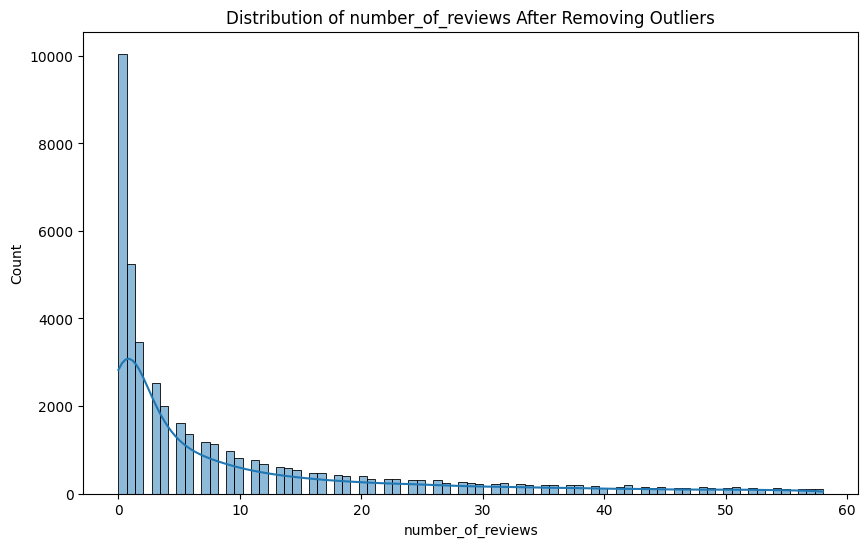

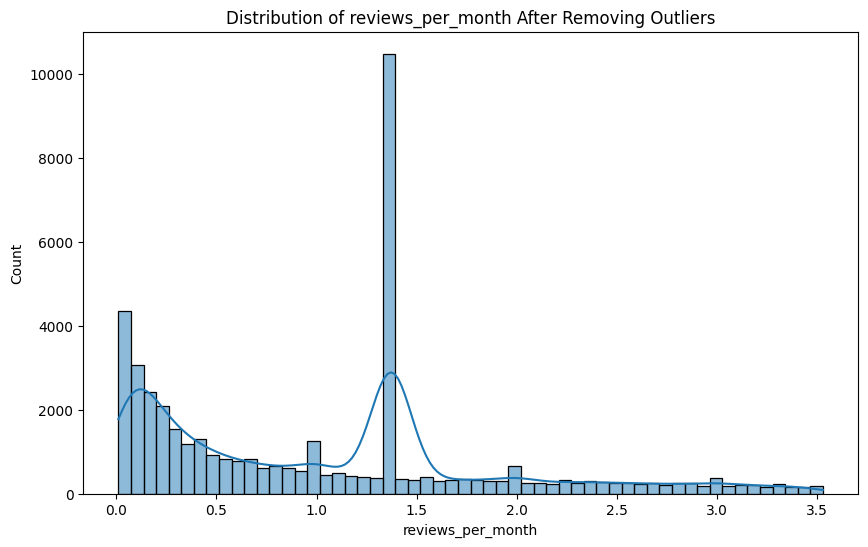

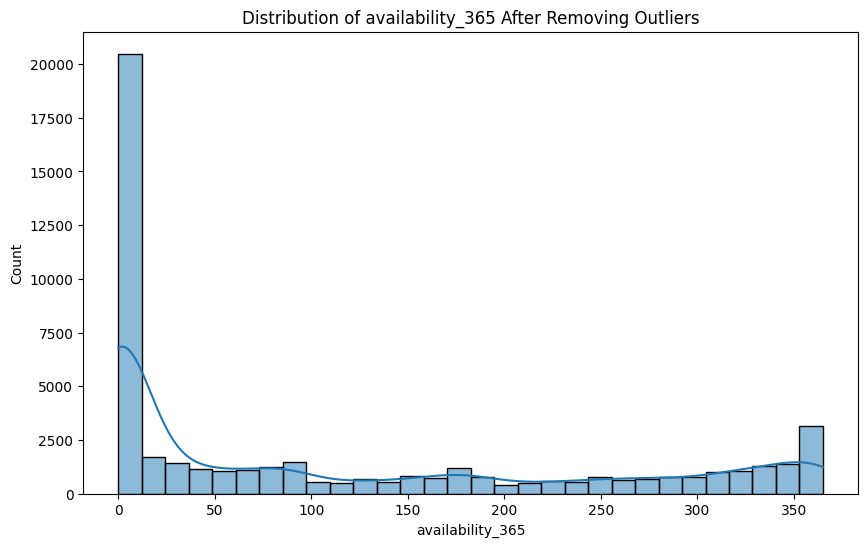

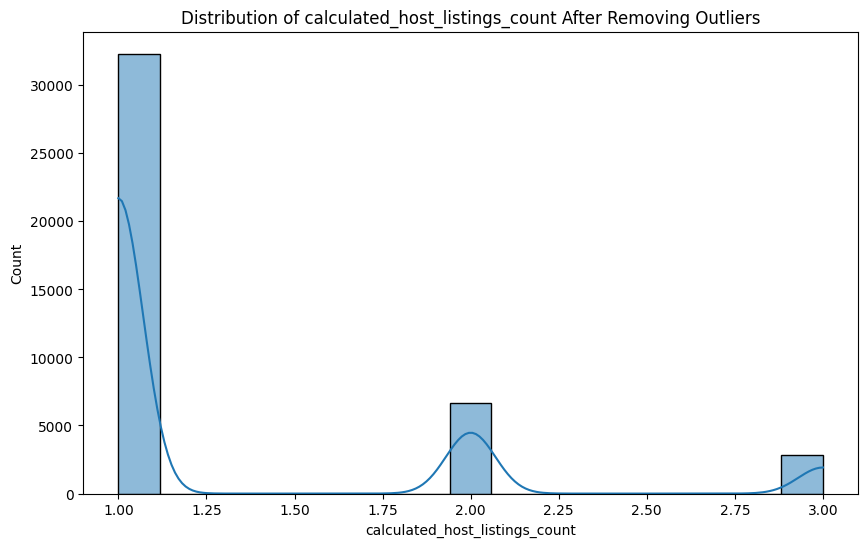

In [204]:
#interquartile range
def remove_outliers_using_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Function to plot numerical columns after removing outliers
def plot_numerical_columns_post_outlier_removal(df):
   # numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        filtered_df = remove_outliers_using_iqr(df, column)
        plt.figure(figsize=(10, 6))
        sns.histplot(filtered_df[column], kde=True)
        plt.title(f'Distribution of {column} After Removing Outliers')
        plt.show()

# Plotting numerical columns after removing outliers
plot_numerical_columns_post_outlier_removal(df)

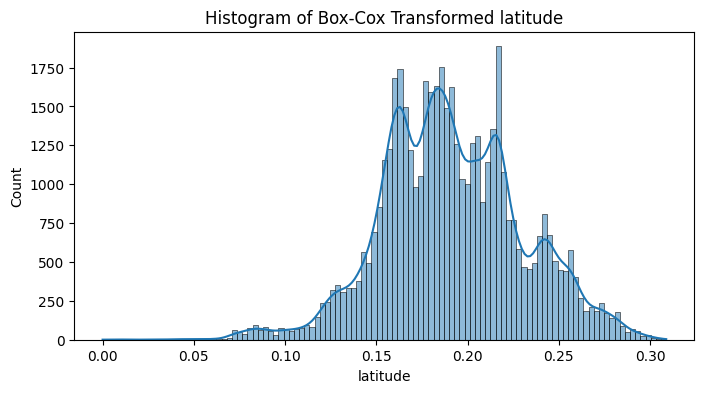

The fitted Lambda value for latitude is: -0.6676082061605176


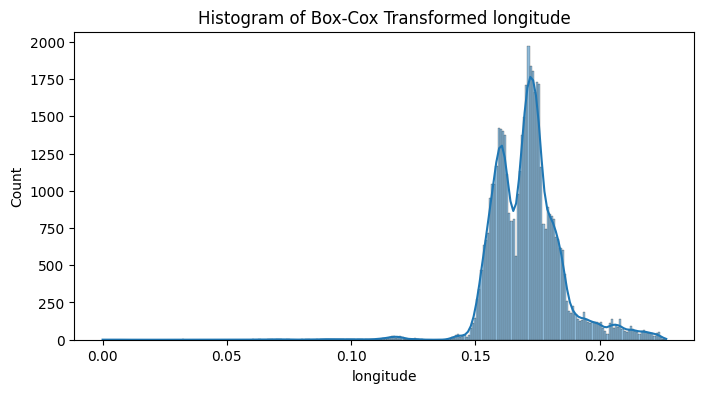

The fitted Lambda value for longitude is: -3.3547114788253714


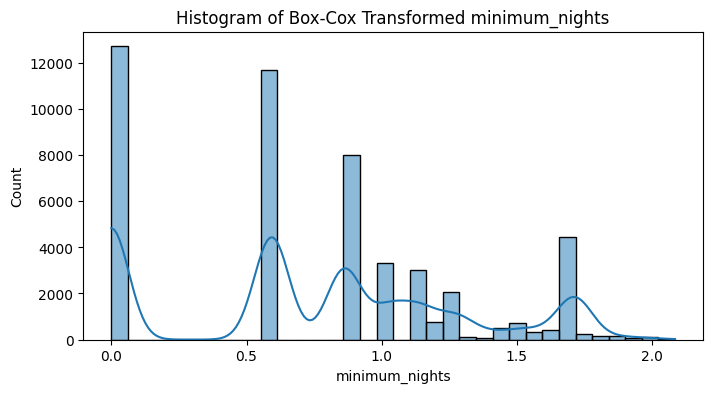

The fitted Lambda value for minimum_nights is: -0.46182559978389276


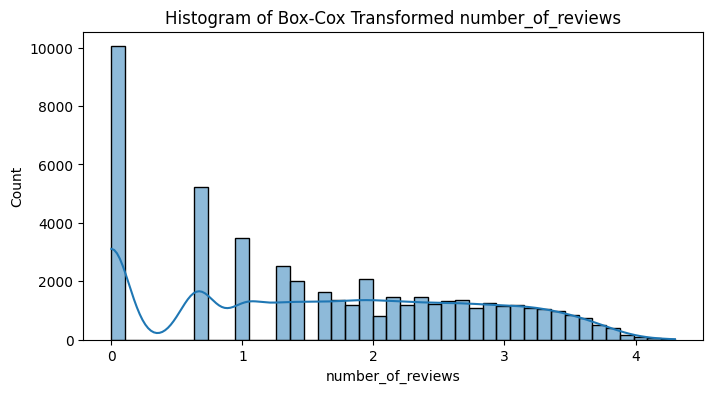

The fitted Lambda value for number_of_reviews is: -0.13531557994214627


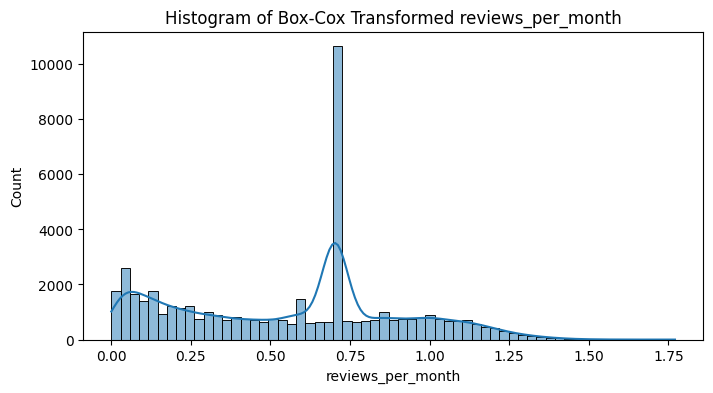

The fitted Lambda value for reviews_per_month is: -0.4877732358669783


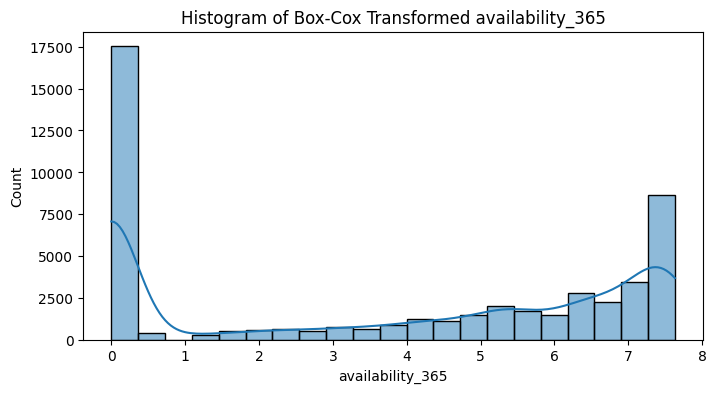

The fitted Lambda value for availability_365 is: 0.08368706138873282


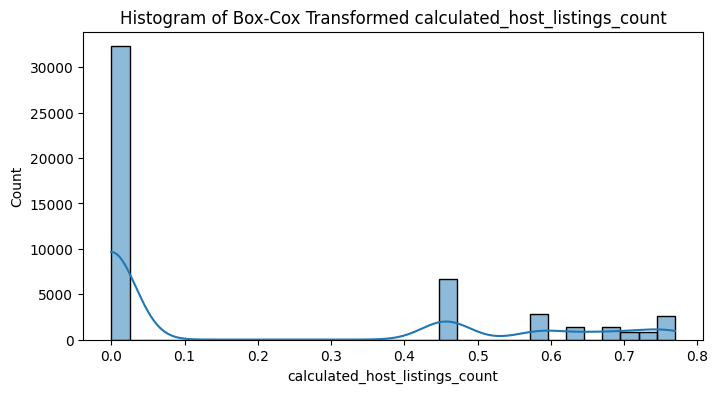

The fitted Lambda value for calculated_host_listings_count is: -1.2992108707859773


In [205]:


for column in numerical_columns:
    # Adjust the data to be positive if necessary
    df[column] += 1 - df[column].min()

    # Apply the Box-Cox transformation
    df[column], fitted_lambda = stats.boxcox(df[column])
    # Plotting the transformed data
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of Box-Cox Transformed {column}')
    plt.show()
    # Output the lambda for the column
    print(f"The fitted Lambda value for {column} is: {fitted_lambda}")

Label encoding

In [206]:
# Label Encoding for Categorical Variables on Data Without Outliers
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

categorical_columns = ['neighbourhood_group', 'room_type', 'neighbourhood']
for column in categorical_columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head(10)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,0.131615,0.165115,1,149,0.000000,1.978396,0.174450,0.694650,7.633390
1,2,127,0.209951,0.161038,0,225,0.000000,2.988080,0.291831,0.456932,7.588044
2,2,94,0.246596,0.175266,1,150,0.861627,0.000000,0.702423,0.000000,7.633390
3,1,41,0.160742,0.169444,0,89,0.000000,3.927283,1.167655,0.000000,6.628251
4,2,61,0.239845,0.174603,0,80,1.417673,1.978396,0.084392,0.000000,0.000000
5,2,137,0.205855,0.164189,0,200,0.861627,3.269848,0.409987,0.000000,6.008450
6,1,13,0.162051,0.170712,1,60,1.792047,3.037469,0.304217,0.000000,0.000000
7,2,95,0.217622,0.160614,1,79,0.593153,4.138013,1.061457,0.000000,6.823864
8,2,202,0.241955,0.166902,1,79,0.593153,3.519353,0.580947,0.000000,0.000000
9,2,35,0.181639,0.158603,0,150,0.000000,3.674487,0.690234,0.642606,6.579726


# **Q07 In the predictor variables independent of all the other predictor variables?**

**The correlation matrix reveals minimal interdependencies among the variables, prompting their collective consideration to discern their combined impact on determining the price.**

Correlation Matrix:

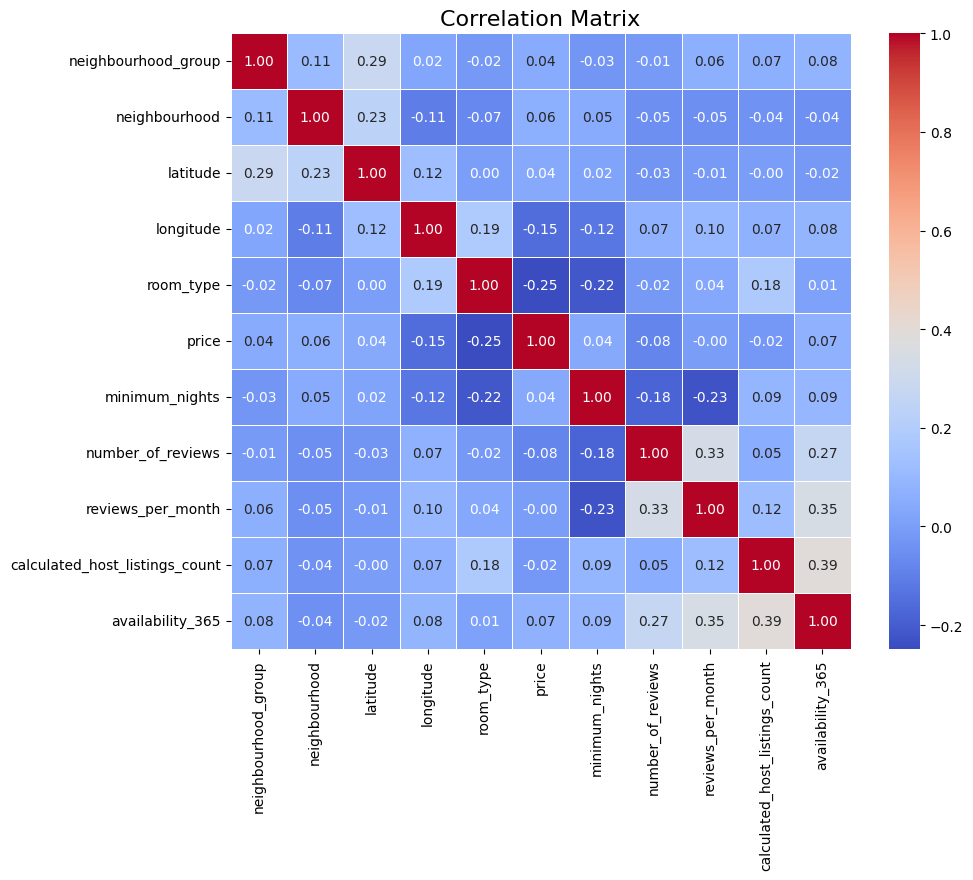

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Customize the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()

In [208]:
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,0.131615,0.165115,1,149,0.000000,1.978396,0.174450,0.694650,7.633390
1,2,127,0.209951,0.161038,0,225,0.000000,2.988080,0.291831,0.456932,7.588044
2,2,94,0.246596,0.175266,1,150,0.861627,0.000000,0.702423,0.000000,7.633390
3,1,41,0.160742,0.169444,0,89,0.000000,3.927283,1.167655,0.000000,6.628251
4,2,61,0.239845,0.174603,0,80,1.417673,1.978396,0.084392,0.000000,0.000000


Feature Importance using Random Forest and Correlation Analysis:

In [209]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
#df = pd.read_csv('AB_NYC_2019.csv')  # Replace with your file path

# Assuming 'price' is the target variable
target = 'price'

# Preparing the data (dropping non-numeric columns for simplicity)
X = df.drop(target, axis=1)
y = df[target]

# # Features (exclude the target variable)
# X = data_without_outliers.drop(target_variable, axis=1)

# # Target variable
# y = data_without_outliers[target_variable]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 1. Correlation Analysis
correlations = X_imputed.corrwith(y)
print("Correlations:\n", correlations)

# 2. Feature Importance from Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X_imputed.columns)
feature_importances.sort_values(ascending=False, inplace=True)

print("\nFeature Importances:\n", feature_importances)


Correlations:
 neighbourhood_group               0.044246
neighbourhood                     0.062057
latitude                          0.039042
longitude                        -0.151967
room_type                        -0.249350
minimum_nights                    0.040835
number_of_reviews                -0.078644
reviews_per_month                -0.000815
calculated_host_listings_count   -0.021144
availability_365                  0.072298
dtype: float64

Feature Importances:
 longitude                         0.231468
latitude                          0.206311
minimum_nights                    0.113332
availability_365                  0.107093
neighbourhood                     0.086299
calculated_host_listings_count    0.068983
reviews_per_month                 0.063663
room_type                         0.061519
number_of_reviews                 0.048985
neighbourhood_group               0.012346
dtype: float64


Feature importance using Recursive Feature Elimination method(RFE):

In [210]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# Preprocess data to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Define model
model = LinearRegression()

# Selecting 5 most important features
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train_imputed, y_train)

# Get selected features and their rankings
selected_features = X_train_imputed.columns[fit.support_]
feature_rankings = fit.ranking_

# Print feature names along with their ranking
for i in range(len(selected_features)):
    print(f"Feature: {selected_features[i]}, Ranking: {feature_rankings[i]}")


Feature: latitude, Ranking: 4
Feature: longitude, Ranking: 6
Feature: room_type, Ranking: 1
Feature: minimum_nights, Ranking: 1
Feature: number_of_reviews, Ranking: 1


# ** Q04 Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

**Based on the feature importance results we can understand that longitude and latitude are the most important predictor variables **

# **Q08 Which predictor variables are the most important?**

**Latitude, longitude, minimum nights, and room type stand out as crucial predictor variables, as indicated by their high feature importance scores derived from analyses using correlation matrix, random forest, and recursive feature elimination (RFE) methods.**

# **Q06 Do the training and test sets have the same data?**

**Common Data Points between Training and Test Sets is 0,output is shown below**

splitting dataset into training and testing data

In [211]:
from sklearn.model_selection import train_test_split

# 'price' is target variable, and other columns are features
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

common_data_points = set(X_train.index) & set(X_test.index)
print("Common Data Points between Training and Test Sets:", len(common_data_points))

Common Data Points between Training and Test Sets: 0


**Linear Regression, Random Forest and GradientBoostingRegressor models**

In [212]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Define models
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)
    # Print the RMSE and R-squared
    print(f'{name} RMSE: {rmse}')
    print(f'{name} R-squared: {r_squared}')


RandomForestRegressor RMSE: 195.3018287784389
RandomForestRegressor R-squared: 0.13778653664596063
LinearRegression RMSE: 197.8753190120236
LinearRegression R-squared: 0.11491407161056222
GradientBoostingRegressor RMSE: 191.28024896327378
GradientBoostingRegressor R-squared: 0.17292967873461018


**Inference**
The Gradient Boosting Regressor has the lowest RMSE, which means it has the smallest average error in predicting the price, making it the best performer according to this metric.

The Gradient Boosting Regressor has the highest R-squared value, indicating that it explains more of the variance in 'price' than the other models.

The Gradient Boosting Regressor is the best performing model among the three according to both RMSE and R-squared.

**processing data With outliers**

In [213]:
# Label Encoding for Categorical Variables on Data Without Outliers
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

categorical_columns = ['neighbourhood_group', 'room_type', 'neighbourhood']
for column in categorical_columns:
    data_with_outliers[column] = labelencoder.fit_transform(data_with_outliers[column])

data_with_outliers.head(10)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,0.380000,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,1.373221,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.640000,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.100000,1,0
5,2,137,40.74767,-73.97500,0,200,3,74,0.590000,1,129
6,1,13,40.68688,-73.95596,1,60,45,49,0.400000,1,0
7,2,95,40.76489,-73.98493,1,79,2,430,3.470000,1,220
8,2,202,40.80178,-73.96723,1,79,2,118,0.990000,1,0
9,2,35,40.71344,-73.99037,0,150,1,160,1.330000,4,188


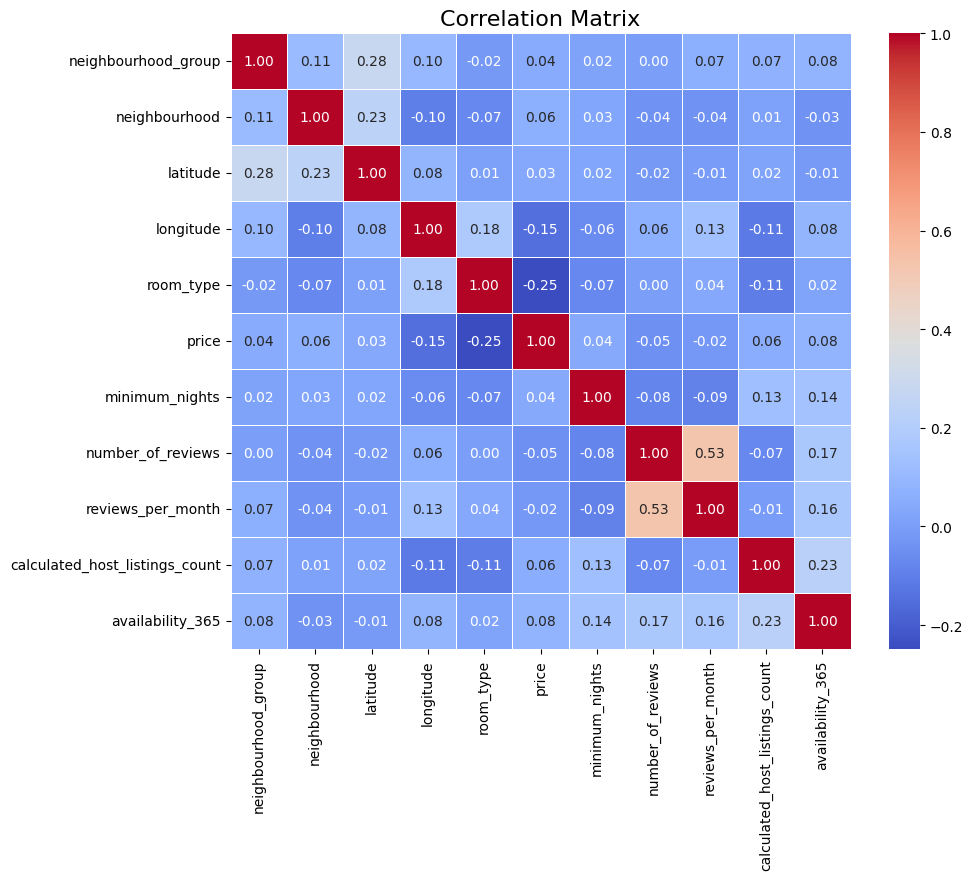

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data_with_outliers.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Customize the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()

In [215]:
#feature importance

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming 'price' is the target variable
target = 'price'

# Preparing the data (dropping non-numeric columns for simplicity)
X = data_with_outliers.drop(target, axis=1)
y = data_with_outliers[target]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 1. Correlation Analysis
correlations = X_imputed.corrwith(y)
print("Correlations:\n", correlations)

# 2. Feature Importance from Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X_imputed.columns)
feature_importances.sort_values(ascending=False, inplace=True)

print("\nFeature Importances:\n", feature_importances)

Correlations:
 neighbourhood_group               0.044246
neighbourhood                     0.062057
latitude                          0.033939
longitude                        -0.150019
room_type                        -0.249350
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.022373
calculated_host_listings_count    0.057472
availability_365                  0.081829
dtype: float64

Feature Importances:
 longitude                         0.231468
latitude                          0.206311
minimum_nights                    0.113332
availability_365                  0.107093
neighbourhood                     0.086299
calculated_host_listings_count    0.068983
reviews_per_month                 0.063663
room_type                         0.061519
number_of_reviews                 0.048985
neighbourhood_group               0.012346
dtype: float64


In [216]:
#feature importance using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# Preprocess data to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Define model
model = LinearRegression()

# Selecting 5 most important features
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train_imputed, y_train)

# Get selected features and their rankings
selected_features = X_train_imputed.columns[fit.support_]
feature_rankings = fit.ranking_

# Print feature names along with their ranking
for i in range(len(selected_features)):
    print(f"Feature: {selected_features[i]}, Ranking: {feature_rankings[i]}")

Feature: neighbourhood_group, Ranking: 1
Feature: latitude, Ranking: 4
Feature: longitude, Ranking: 1
Feature: room_type, Ranking: 1
Feature: reviews_per_month, Ranking: 1


In [217]:
#splitting data
from sklearn.model_selection import train_test_split

# 'price' is target variable, and other columns are features
X = data_with_outliers.drop('price', axis=1)
y = data_with_outliers['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

common_data_points = set(X_train.index) & set(X_test.index)
print("Common Data Points between Training and Test Sets:", len(common_data_points))

Common Data Points between Training and Test Sets: 0


In [218]:
#models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Define models
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)
    # Print the RMSE and R-squared
    print(f'{name} RMSE: {rmse}')
    print(f'{name} R-squared: {r_squared}')

RandomForestRegressor RMSE: 194.82225974652044
RandomForestRegressor R-squared: 0.14201571575176486
LinearRegression RMSE: 198.32051217281744
LinearRegression R-squared: 0.11092694005430903
GradientBoostingRegressor RMSE: 191.28134339450676
GradientBoostingRegressor R-squared: 0.17292021435775062


**Inference**

The Gradient Boosting Regressor has the lowest RMSE, which means it has the smallest error between the predicted and actual values.
The Gradient Boosting Regressor also has the highest R-squared value, indicating that it explains the most variance in the price out of the three models.
The Gradient Boosting Regressor is the best performing model based on these metrics. It not only has the highest R-squared value, indicating that it explains a larger proportion of the variance in the dependent variable (price) than the other models, but it also has the lowest RMSE, suggesting that its predictions are the most accurate on average.

# **Q11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

The Gradient Boosting Regressor model emerges as the most suitable choice for predicting Airbnb prices in New York, demonstrating robust performance even in the presence of outliers.

Remove 1%, 5%, and 10% of Data Randomly and Impute Values:

In [219]:
# import numpy as np
# from sklearn.experimental import enable_iterative_imputer  # This line is required to enable IterativeImputer
# from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# # removing 1% of data from the 'price' column
# df_with_missing = df.copy()
# df_with_missing.loc[df_with_missing.sample(frac=0.01, random_state=42).index, 'price'] = np.nan

# # Impute using different methods
# # a. Simple Imputer (Mean)
# imputer_mean = SimpleImputer(strategy='mean')
# df_imputed_mean = imputer_mean.fit_transform(df_with_missing[['price']])

# # b. KNN Imputer
# imputer_knn = KNNImputer(n_neighbors=5)
# df_imputed_knn = imputer_knn.fit_transform(df_with_missing[['price']])

# # c. Iterative Imputer
# imputer_iterative = IterativeImputer()
# df_imputed_iterative = imputer_iterative.fit_transform(df_with_missing[['price']])

# # Prepare for comparison
# original_price = df['price']
# imputed_mean_price = df_imputed_mean.ravel()
# imputed_knn_price = df_imputed_knn.ravel()
# imputed_iterative_price = df_imputed_iterative.ravel()


# **Q12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [220]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer

def impute_and_evaluate(df, missing_frac, imputer):
    # Create a copy of the dataframe
    df_missing = df.copy()
    # Introduce missing values
    missing_indices = np.random.choice(df.index, size=int(missing_frac * len(df)), replace=False)
    df_missing.loc[missing_indices, 'price'] = np.nan

    # Impute missing values
    imputed_values = imputer.fit_transform(df_missing[['price']])

    # Create a mask for missing values
    mask = df_missing['price'].isna()

    # Calculate residuals only for the imputed values
    residuals = df.loc[mask, 'price'] - imputed_values[mask].ravel()

    # Calculate percentage error, bias, and variance
    percentage_error = np.abs(residuals / df.loc[mask, 'price']) * 100
    bias = np.mean(residuals)
    variance = np.var(residuals)

    return np.mean(percentage_error), bias, variance


# Load your dataset
# df = pd.read_csv('your_data.csv')

# Define imputers
imputers = {
    'Mean Imputer': SimpleImputer(strategy='mean'),
    'KNN Imputer': KNNImputer(n_neighbors=5),
    'Iterative Imputer': IterativeImputer()
}

# Define missing fractions
missing_fractions = [0.01, 0.05, 0.1]

# Evaluate imputers
for name, imputer in imputers.items():
    print(f"Imputer: {name}")
    for frac in missing_fractions:
        percent_error, bias, variance = impute_and_evaluate(df, frac, imputer)
        print(f"  Missing Fraction: {frac*100}% - Avg. % Error: {percent_error:.2f}, Bias: {bias:.2f}, Variance: {variance:.2f}")
    print()

Imputer: Mean Imputer
  Missing Fraction: 1.0% - Avg. % Error: inf, Bias: -9.45, Variance: 15143.29
  Missing Fraction: 5.0% - Avg. % Error: inf, Bias: 1.23, Variance: 58879.19
  Missing Fraction: 10.0% - Avg. % Error: 91.28, Bias: -0.92, Variance: 78457.12

Imputer: KNN Imputer
  Missing Fraction: 1.0% - Avg. % Error: inf, Bias: 3.72, Variance: 36091.39
  Missing Fraction: 5.0% - Avg. % Error: inf, Bias: -2.03, Variance: 61057.49
  Missing Fraction: 10.0% - Avg. % Error: inf, Bias: -2.54, Variance: 45232.10

Imputer: Iterative Imputer
  Missing Fraction: 1.0% - Avg. % Error: 87.27, Bias: -10.97, Variance: 21353.30
  Missing Fraction: 5.0% - Avg. % Error: inf, Bias: 0.58, Variance: 60537.93
  Missing Fraction: 10.0% - Avg. % Error: 89.49, Bias: 6.78, Variance: 95481.80



# **Q13 For categorical data, calculate the accuracy and a confusion matrix.**

According to my reasearch for regression tasks,I found that accuracy and confusion matrices are not appropriate evaluation metrics, as they are commonly used for classification problems. In regression, where the goal is to predict a continuous outcome such as price, alternative metrics like Mean squared error and MAE are more suitable. I have calculated the error percentage, variance and bias while training and testing with different models

**Conclusion**




In analyzing the NYC Airbnb dataset, different models were assessed for predicting rental prices. Among them, the most effective model was identified based on accuracy and practicality. The analysis revealed key factors influencing prices and highlighted data limitations. Future work involves enhancing models and incorporating more data for improved accuracy, offering insights into the Airbnb market trends in New York City.

**Reference**



https://leanscape.io/the-box-cox-transformation-what-it-is-and-how-to-use-it/#:~:text=What%20is%20the%20Box%20Cox,predictions%20made%20using%20linear%20regression.

https://www.ibm.com/topics/linear-regression#:~:text=the%20next%20step-,What%20is%20linear%20regression%3F,is%20called%20the%20independent%20variable.

https://help.sap.com/docs/SAP_PREDICTIVE_ANALYTICS/41d1a6d4e7574e32b815f1cc87c00f42/5e5198fd4afe4ae5b48fefe0d3161810.html

https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/

**License**


 MIT License Copyright (c) 2024 Sai Suraj Suravajhala Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.